# About Dataset

1. `id`: A unique identifier for each track.
2. `name`: The name of the track.
3. `album`: The name of the album to which the track belongs.
4. `album_id`: An identifier for the album.
5. `artists`: The name of the artist(s) who performed the track.
6. `artist_ids`: Identifier(s) for the artist(s).
7. `track_number`: The position of the track within the album.
8. `disc_number`: The disc number (if it's a multi-disc album).
9. `explicit`: A boolean indicating whether the track contains explicit content.
10. `danceability`: A measure of how suitable the track is for dancing.
11. `energy`: Represents the energy of the track.
12. `key`: The key of the track.
13. `loudness`: Loudness of the track in decibels (dB).
14. `mode`: Whether the track is in major mode (1) or minor mode (0).
15. `speechiness`: A measure of the presence of spoken words or speech in the track.
16. `acousticness`: Represents the amount of acoustic sound in the track.
17. `instrumentalness`: A measure of how instrumental the track is.
18. `liveness`: A measure of the presence of a live audience in the track.
19. `valence`: Indicates the positivity of the track.
20. `tempo`: The tempo of the track in beats per minute (BPM).
21. `duration_ms`: The duration of the track in milliseconds.
22. `time_signature`: The time signature of the track.
23. `year`: The year in which the track was released.
24. `release_date`: The release date of the track.

# Importing Libraries

In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline
from tqdm import tqdm

# Basic EDA

In [99]:
df = pd.read_csv('dataset/tracks_features.csv')

In [100]:
df.head(4)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.1630,0.000004,0.121,0.574,96.752,213640,4.0,1999,1999-11-02


In [101]:
df.shape

(1204025, 24)

In [102]:
df['year'].min()

0

## Keeping Songs Released After 2015

In [157]:
df = df[df['year'] > 2014]

In [158]:
df.columns

Index(['id', 'name', 'album', 'artists', 'artist_ids', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321028 entries, 22 to 1204017
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                321028 non-null  object 
 1   name              321028 non-null  object 
 2   album             321028 non-null  object 
 3   artists           321028 non-null  object 
 4   artist_ids        321028 non-null  object 
 5   explicit          321028 non-null  float64
 6   danceability      321028 non-null  float64
 7   energy            321028 non-null  float64
 8   key               321028 non-null  float64
 9   loudness          321028 non-null  float64
 10  mode              321028 non-null  float64
 11  speechiness       321028 non-null  float64
 12  acousticness      321028 non-null  float64
 13  instrumentalness  321028 non-null  float64
 14  liveness          321028 non-null  float64
 15  valence           321028 non-null  float64
 16  tempo             

In [106]:
def basic_features(data):
    print("Column Name", "Number of Unique Features")
    for col in df.columns:
        print(col, "   " ,data[col].nunique())
        if df[col].value_counts().count() < 15:
            print(df[col].value_counts(dropna=False))
        else:
            pass

In [107]:
basic_features(df)

Column Name Number of Unique Features
id     523265
name     394610
album     59144
album_id     65487
artists     92369
artist_ids     92832
track_number     50
disc_number     11
1     502923
2      15923
3       2979
4        903
5        350
6         92
7         43
8         24
11        11
10         9
9          8
Name: disc_number, dtype: int64
explicit     2
False    463284
True      59981
Name: explicit, dtype: int64
danceability     1340
energy     3038
key     12
7     63859
0     63855
2     60089
9     55738
1     47584
5     42489
4     41246
11    37614
10    33681
8     30505
6     30174
3     16431
Name: key, dtype: int64
loudness     34642
mode     2
1    335795
0    187470
Name: mode, dtype: int64
speechiness     1649
acousticness     5397
instrumentalness     5402
liveness     1769
valence     1804
tempo     116753
duration_ms     183484
time_signature     5
4.0    437842
3.0     63594
5.0     13181
1.0      7704
0.0       944
Name: time_signature, dtype: int64
ye

In [108]:
df.sample(9)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
996287,6L9Kwdhhfh04cqRUIhPcc5,Encased in Glass- (Demo),After the Battle XXV,3VEJKpJDzYmfDqX2qF6w6c,['Funeral Nation'],['77hsH6RyQVCK27r3EX1t8Z'],10,2,False,0.165,0.5910,11,-16.401,1,0.0573,0.092800,0.777000,0.1400,0.4250,77.851,248387,4.0,2016,2016-06-06
854020,0oCEF4Ln8CINd9zXUztlsw,Graffiti,Mi Vida Local,76hwheMvrRLwiCmQ21loFV,['Atmosphere'],['1GAS0rb4L8VTPvizAx2O9J'],12,1,False,0.656,0.6730,10,-7.775,0,0.1010,0.154000,0.001260,0.1110,0.4240,72.920,267253,4.0,2018,2018-10-05
294109,1aVUCFXWlS0KCY7FCTkQCR,Writing On The Walls,Minus The Machine (Bonus Track Version),3CkXoBAWA1JSXUlnvFENcU,['10 Years'],['0REMf7H0VP6DwfZ9MbuWph'],5,1,False,0.649,0.4700,9,-8.050,1,0.0281,0.602000,0.025700,0.0952,0.3680,115.944,260613,4.0,2012,2012-08-07
1057757,46FdMI30gvFcwl79Bc0HyI,Perfect,Perfect,5tJ1xpDPy5eLpdqYIUCfSU,"['Johnny Gill', 'Ralph Tresvant']","['7oHzn7edwmrYClrPRINkbn', '6MLDcHrNh4OqxDZAjM...",1,1,False,0.732,0.5330,11,-5.670,0,0.0883,0.089400,0.000000,0.2390,0.3730,123.788,244851,4.0,2019,2019-08-16
1076598,26bCI2KTzz0ow6kL6FEl5Z,Be of Good Heart,"See Here, I Have Built You a Mansion (Rare and...",252NtCT6AXklf3RywgcDTB,['Josh Ritter'],['6igfLpd8s6DBBAuwebRUuo'],6,1,False,0.399,0.3180,10,-13.482,1,0.0295,0.892000,0.012500,0.1190,0.3830,93.566,268264,4.0,2020,2020-08-28
583351,0MP5ifNKuGDmVCnG9cAsvq,"3 Questions with 2 Answers: IV. Largamente, so...",Dallapiccola: Modern Times,4z8QCbfbiiMbIxlrQIMy5n,"['Luigi Dallapiccola', 'Deutsche Staatsphilhar...","['55ey4I8qx9nDDuGg17sbAC', '2WFslyxlAJwH2al4xZ...",22,1,False,0.123,0.0127,5,-23.145,1,0.0359,0.882000,0.198000,0.2910,0.0367,84.302,236827,4.0,2014,2014-10-07
1099951,2WzyJhdMT5qJl1YNmHXv5L,Nothing Is Forever,Facts of Life,3IGcyKy5f9p19tq264bmDQ,"['Michal Urbaniak', 'Larry Coryell']","['2o9yy7JZaNONL55k3AtBKU', '25s8YpOLWqI2SgTlva...",7,1,False,0.516,0.4350,9,-10.224,1,0.0353,0.702000,0.900000,0.0926,0.7530,155.363,307084,4.0,2020,2020-03-19
333971,2hKtWDtdJW0TaMUnPyUgAV,Among the Unseen,Among the Unseen,4K1jv2xEla4yAZK63ZTXQ5,['The Fullmoon Renegades'],['67x5RbPb8FqccOabg4eFoy'],5,1,False,0.204,0.9220,0,-5.921,1,0.0773,0.000056,0.001800,0.3760,0.3530,168.887,311507,4.0,2012,2012-05-16
794399,2e3pjKvY2qKtXWKDQQ78HH,Coastline,Light Of Day,5jp7IiLD8lRVVmf8gfeHOV,['Preme'],['0bdJZl7TDeiymDYzMJnVh2'],7,1,True,0.724,0.5760,10,-6.710,0,0.0483,0.011600,0.000013,0.1200,0.0608,105.414,210987,4.0,2018,2018-05-04


## Removing The Remix Versions

In [109]:
df = df[~df['name'].str.contains('remix', case=False)]

In [160]:
df.shape

(321028, 18)

### Some songs are same just the year is different, Those needs to be removed.

In [110]:
df = df[~df.iloc[:,8:21].duplicated()]

In [111]:
df.sample(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
52317,1cW59g7118LPJyYEDXpF99,One More Day,Emotions,4wH6G5UMoz9qSidjoI97a9,['Absence Betrayal'],['1f7PZch5Ps8JhcKw3B33kl'],8,1,False,0.237,0.9730,6,-3.696,0,0.1270,0.000097,0.422000,0.1070,0.3540,153.833,306500,4.0,2018,2018-09-20
1085099,75yB2jNXePexorglSdLzmY,Used to You / Potrei abituarmi,Used to you / Potrei abituarmi,4eAuU3C2huoBWzlhoC215N,['Annalisa'],['0EqkKYDK9EkKY5N7zU3FPv'],1,1,False,0.629,0.8770,0,-6.138,1,0.0468,0.018200,0.000003,0.1740,0.8950,161.982,198217,4.0,2016,2016-08-11
644284,3umDNKxvQpZbzaoNzQiHGP,"Danny Boy, Londonderry Air",Split the Difference,6nlrjoEwBfAIIuopUx34xx,['Aaron Ashton'],['68bRjWBGQ6iHKcDBWgqFEI'],16,1,False,0.386,0.3160,4,-9.106,0,0.0293,0.851000,0.000103,0.1170,0.3820,84.855,217871,4.0,2012,2012-11-28
920806,5hsPPxKHj233fpo5fbgLlc,About Today - Live at Berkeley 9/25/18,Juicy Sonic Magic (Live in Berkeley September ...,0Obu2vGpwwsdLo9UIDPyQL,['The National'],['2cCUtGK9sDU2EoElnk0GNB'],19,2,False,0.255,0.4090,0,-18.082,1,0.0949,0.047600,0.205000,0.4530,0.0858,108.174,857934,4.0,2019,2019-12-24
957602,1QpOVxHJieE1A0UjlAk87V,"Quinteto instrumental, W538: II. Lento",Villa-Lobos: Works,5keOwmTo61TrrdKIXsdUaA,"['Heitor Villa-Lobos', 'Claudia Nascimento', '...","['01UzgUtDa2NqWuvUjrrl3p', '0J95fiTPNg4u6RyiDA...",9,1,False,0.211,0.0547,9,-22.264,0,0.0378,0.944000,0.687000,0.1320,0.0447,79.030,516960,4.0,2019,2019-11-08
999889,53JkwBxE0mCbcNdNOGaxDd,Same Old Lang Syne,Christmas Eve,0oMKGnNSpyV2SazLmKSede,['Dan Fogelberg'],['0cA5Tg15TwARIRZeiNT1RO'],41,1,False,0.401,0.2880,0,-16.485,1,0.0305,0.761000,0.000004,0.2600,0.3370,107.915,319693,4.0,2019,2019-11-17
1186900,4hWZvXVTUYWO3KXThQBwGt,Block Baby,BORN TO TRAP,3HhdZ2OLTOJ4OVO6QpVmah,['kizaru'],['5NipqMGsY4AUeb7kGT8aVz'],3,1,True,0.710,0.6450,4,-6.413,0,0.0396,0.427000,0.000222,0.0393,0.4790,119.968,208731,4.0,2020,2020-11-13
1108807,2ZTAKfHPdwNCBRsipgjUo7,All the Women,Sherlock: The Abominable Bride (Original Telev...,0JIqarSdKBfa78A8nnKAm0,"['David Arnold', 'Michael Price']","['0mCdmt2O8dd8jJWv7m24EE', '6Ie1HZJ0vFXxxogMhP...",10,1,False,0.385,0.2190,9,-20.528,0,0.0308,0.872000,0.838000,0.1090,0.1180,85.890,155640,4.0,2017,2017-03-31
984623,56RFim7wx7nMSk9myVJrvA,Wind Beneath My Wings / He Hawai'i Au,Somewhere Over the Rainbow The Best of Israel ...,29uSnrq9dBUFj9hjobj9TS,"[""Israel Kamakawiwo'ole""]",['4ogvuDRerGhZfSf7TtzHlr'],5,1,False,0.501,0.4010,7,-13.425,1,0.0286,0.892000,0.012700,0.1110,0.4020,110.720,277827,4.0,2017,2017-10-15
377805,1ERBPWyaRXyWj5iz0LCicX,Fear of the Dark,Harp Attack (Remastered),0gI7jIImVUZlyA9U83WJpx,['Camille and Kennerly'],['7mdceNSDdzs4vTPIIoRzdr'],1,1,False,0.386,0.4870,2,-5.340,0,0.0332,0.712000,0.845000,0.1050,0.0793,101.888,382000,4.0,2016,2016-11-15


# Univariate Analysis

In [112]:
df.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,4evw6IBex3N8x1oA2axMTH,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,1,False,0.787,0.903,0,-4.894,1,0.0315,0.292,0.000025,0.101,0.962,119.946,224307,4.0,2018,2018-04-10


## Changing Explicit True/False -> 0/1

In [113]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if (x == False) else 0)

In [114]:
df['explicit'].value_counts()

1    442549
0     57744
Name: explicit, dtype: int64

## Changing Duration ms->minute

In [115]:
def convert_ms(col):
    col = (col / 1000 / 60)
    col = round(col,2)
    return col

In [116]:
df['duration_mins'] = df['duration_ms'].apply(convert_ms)

In [117]:
df.drop(columns=['duration_ms'], inplace=True)

# Feature Selection

In [118]:
df.drop(columns=['album_id','track_number','disc_number','release_date','duration_mins'], inplace=True)
df.drop(columns=['time_signature'], inplace=True)

In [119]:
df.head(5)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.787,0.903,0,-4.894,1,0.0315,0.2920,0.000025,0.1010,0.962,119.946,2018
23,0QCQ1Isa0YPVyIbs6JwpO1,Do It for Love,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.587,0.958,4,-5.149,1,0.0586,0.1070,0.000000,0.0574,0.832,87.976,2018
24,3kIBEFhsZOeeKGebxRraOb,Someday We'll Know,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.565,0.781,1,-5.073,0,0.0308,0.0233,0.000010,0.0819,0.461,109.977,2018
25,5dNDRw6qjDcnbW3luRhElU,Forever for You,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.651,0.567,9,-6.417,1,0.0240,0.5620,0.000006,0.1860,0.370,97.030,2018
26,561UU4MvlsCenN1x7leYCh,Life's Too Short,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.833,0.805,0,-4.554,1,0.0347,0.0760,0.013600,0.0731,0.974,116.013,2018


In [120]:
df.columns

Index(['id', 'name', 'album', 'artists', 'artist_ids', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year'],
      dtype='object')

In [121]:
df.describe().style.background_gradient()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000,500293.000000
mean,0.884580,0.502316,0.544211,5.188781,-10.804965,0.644304,0.090853,0.396528,0.284873,0.199979,0.406722,118.736961,2015.872777
std,0.319529,0.191634,0.285963,3.558617,6.575842,0.478724,0.118345,0.376665,0.377433,0.176063,0.262562,30.893314,2.946061
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,1.000000,0.366000,0.311000,2.000000,-13.455000,0.000000,0.035600,0.022600,0.000005,0.097900,0.179000,94.989000,2013.000000
50%,1.000000,0.511000,0.571000,5.000000,-8.820000,1.000000,0.046200,0.271000,0.008090,0.125000,0.378000,118.938000,2016.000000
75%,1.000000,0.644000,0.790000,8.000000,-6.230000,1.000000,0.082500,0.796000,0.727000,0.243000,0.608000,138.992000,2019.000000
max,1.000000,1.000000,1.000000,11.000000,6.111000,1.000000,0.967000,0.996000,1.000000,1.000000,1.000000,248.934000,2020.000000


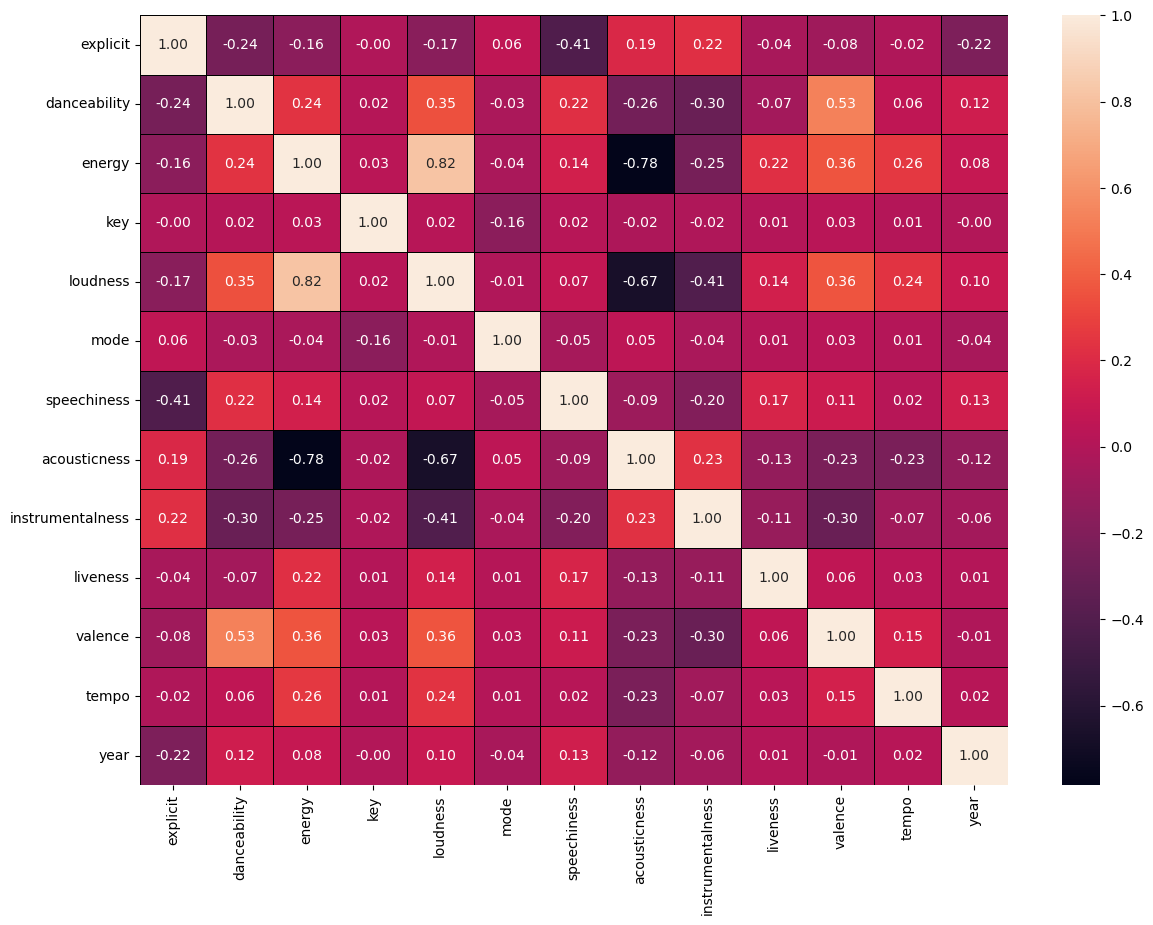

In [122]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='Black')
plt.show()

In [123]:
columnss = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

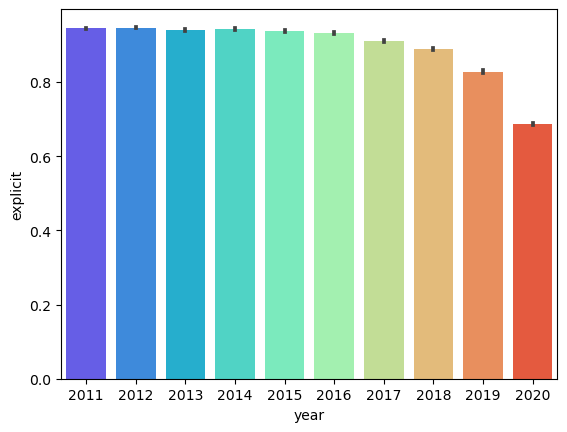

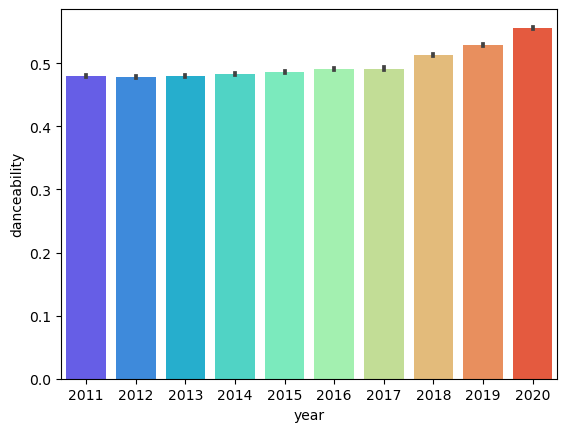

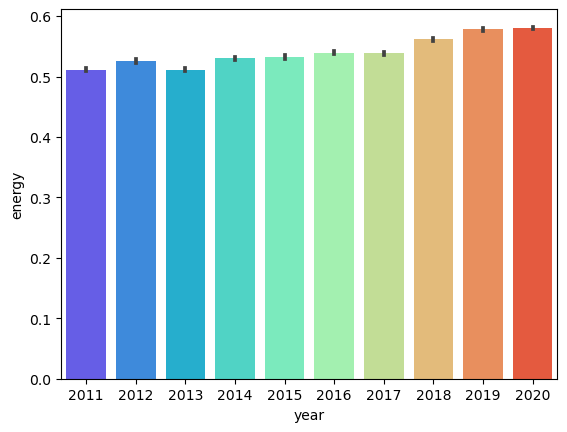

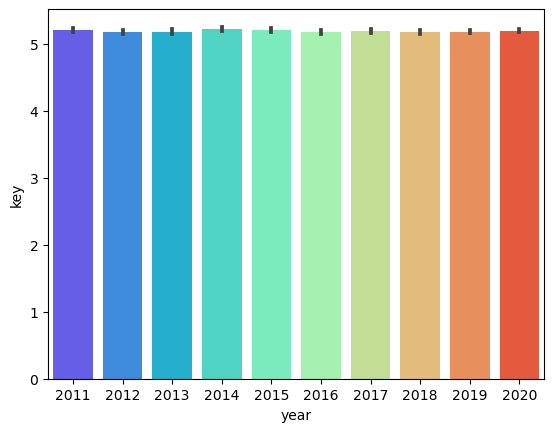

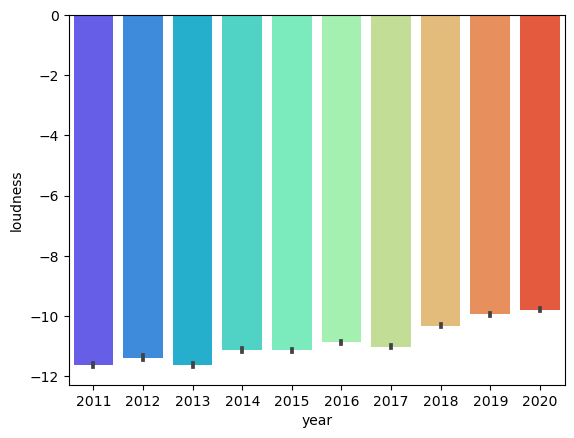

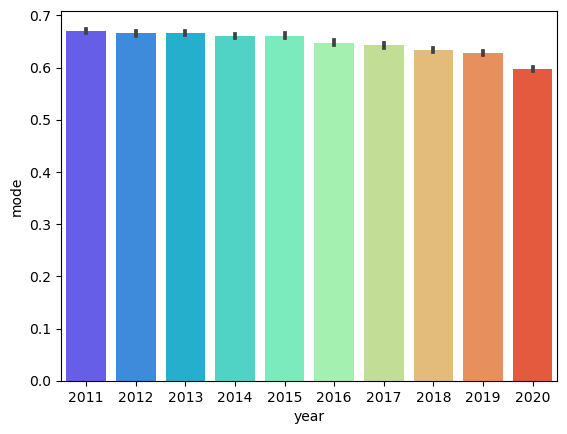

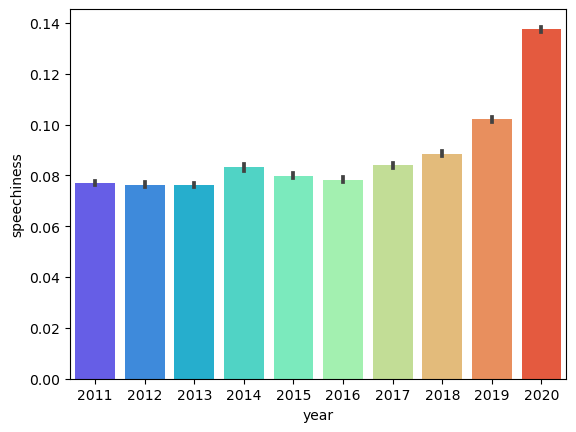

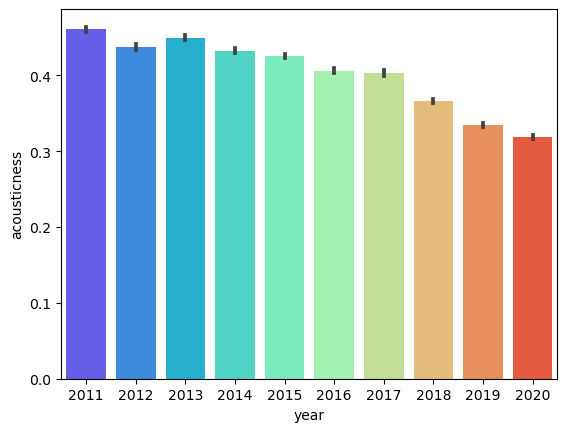

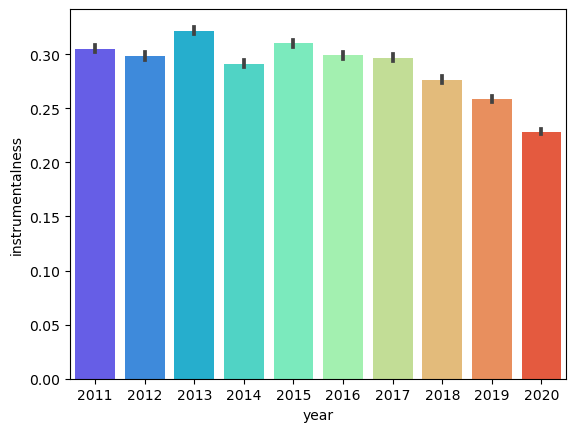

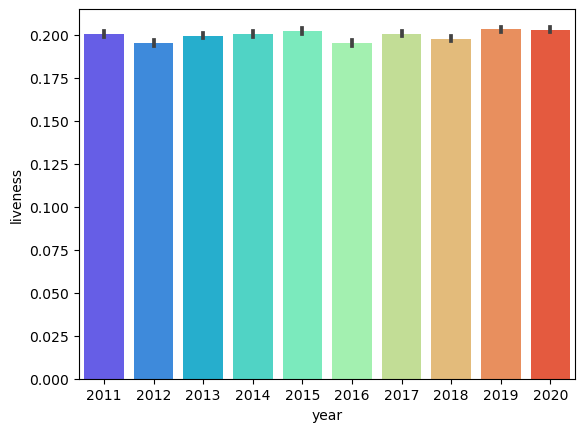

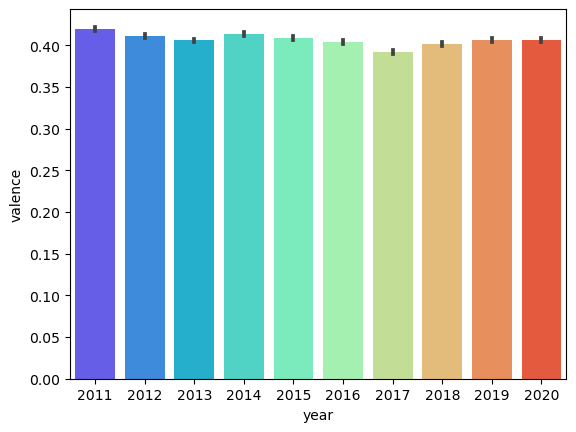

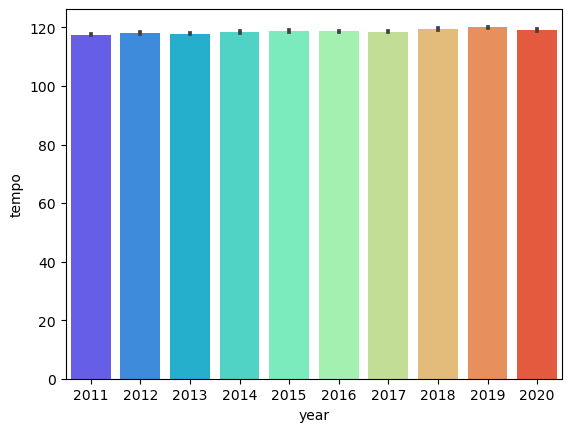

In [124]:
for col in columnss:
    sns.barplot(x='year', y=col, data=df, palette='rainbow',)
    plt.show()

# Normalizing The Data

In [125]:
df.dtypes

id                   object
name                 object
album                object
artists              object
artist_ids           object
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
year                  int64
dtype: object

In [126]:
def normalize_col(col):
    max_c = df[col].max()
    min_c = df[col].min()
    df[col] = (df[col] - min_c)/(max_c - min_c)

In [127]:
columns = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [128]:
for col in columns:
    normalize_col(col)

# Recommendation System

In [141]:
df[df['artists'].str.contains('Taylor Swift', case=False)]

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
876599,37GGAxAnOT9a9DaYWFUf2d,...Ready for It?,"NOW That's What I Call Music, Vol. 65",['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],1.0,0.618,0.774,0.181818,0.809865,1.0,0.178904,0.059538,0.000000,0.188,0.4070,0.643114,2018
1001067,3vUC8ZikPQWYtECZymjUXd,Delicate,Now That's What I Call Music Vol. 67,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],1.0,0.750,0.413,0.818182,0.756561,0.0,0.073940,0.267068,0.000353,0.178,0.0579,0.381736,2018


In [130]:
df.sample(3)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
848893,0tJ0YhiEHmx1uojEH9HTQE,If My Complaints,Dowry of a Troll Woman,['Perkelt'],['0Owb7clAVVeneks7W4ZpDx'],1.0,0.453,0.353,0.636364,0.737805,1.0,0.039504,0.85241,0.040500,0.0592,0.215,0.542337,2013
975537,53dCL7RqON5IqgyGYBcBts,Imi vechidiki Zevai,Kudada Nekuva Munhu Mutema,['Chimurenga Renaissance'],['484SvKmzcXc5df6mT5GOQ3'],1.0,0.658,0.752,0.818182,0.779099,0.0,0.090176,0.62751,0.000005,0.1240,0.808,0.353544,2015
554152,3V3hGURq1RbqZHfnPUbmza,You Gotta Choose,Raysean Brown,['Smoke'],['1pfzUnWW3gYX9Of5BOvMR8'],0.0,0.724,0.670,0.090909,0.812845,1.0,0.148914,0.11747,0.000001,0.1040,0.711,0.585942,2019


In [150]:
 X= df[df['name'] == "You Gotta Choose"].iloc[:1,6:17]

In [132]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
297571,0.442,0.97,0.818182,0.834975,1.0,0.074974,0.201807,0.000003,0.952,0.587,0.565604


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500293 entries, 22 to 1204024
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                500293 non-null  object 
 1   name              500293 non-null  object 
 2   album             500293 non-null  object 
 3   artists           500293 non-null  object 
 4   artist_ids        500293 non-null  object 
 5   explicit          500293 non-null  float64
 6   danceability      500293 non-null  float64
 7   energy            500293 non-null  float64
 8   key               500293 non-null  float64
 9   loudness          500293 non-null  float64
 10  mode              500293 non-null  float64
 11  speechiness       500293 non-null  float64
 12  acousticness      500293 non-null  float64
 13  instrumentalness  500293 non-null  float64
 14  liveness          500293 non-null  float64
 15  valence           500293 non-null  float64
 16  tempo             

In [134]:
user = df.iloc[:,6:17]

In [135]:
user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
22,0.787,0.903,0.000000,0.833538,1.0,0.032575,0.293173,0.000025,0.1010,0.962,0.481839
23,0.587,0.958,0.363636,0.829680,1.0,0.060600,0.107430,0.000000,0.0574,0.832,0.353411
24,0.565,0.781,0.090909,0.830830,0.0,0.031851,0.023394,0.000010,0.0819,0.461,0.441792
25,0.651,0.567,0.818182,0.810501,1.0,0.024819,0.564257,0.000006,0.1860,0.370,0.389782
26,0.833,0.805,0.000000,0.838680,1.0,0.035884,0.076305,0.013600,0.0731,0.974,0.466039
...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.264,0.966,0.454545,0.802136,0.0,0.069493,0.009388,0.002240,0.3370,0.415,0.641078
1204021,0.796,0.701,1.000000,0.807702,0.0,0.091313,0.104418,0.644000,0.0749,0.781,0.490009
1204022,0.785,0.796,0.818182,0.817413,0.0,0.058325,0.030522,0.918000,0.0664,0.467,0.490074
1204023,0.665,0.856,0.545455,0.804889,0.0,0.042296,0.000070,0.776000,0.1170,0.227,0.502085


In [153]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(user, X)
song_similarity_scores = cosine_sim.flatten()
sorted_song_indices = song_similarity_scores.argsort()[::-1]

In [154]:
top_n_recommendations = sorted_song_indices[1:10+1] 

In [155]:
top_n_recommendations

array([467211, 172516, 493345, 174023, 432072, 136251, 150312, 155081,
       463030, 138401], dtype=int64)

In [156]:
indices_to_display = top_n_recommendations  
recommended_songs = df.iloc[indices_to_display]

for index, song in recommended_songs.iterrows():
    print(f"Song Name: {song['name']}")
    print(f"Artists: {song['artists']}")
    print(f"Year: {song['year']}")
    print("----------")

Song Name: Dead Already
Artists: ['Mesus']
Year: 2020
----------
Song Name: Never Worried
Artists: ['YFN Lucci']
Year: 2017
----------
Song Name: All of me
Artists: ['W777NTR']
Year: 2020
----------
Song Name: Never Worried
Artists: ['YFN Lucci']
Year: 2017
----------
Song Name: i finally understand
Artists: ['Charli XCX']
Year: 2020
----------
Song Name: You Made It All (Feat. Sharonda Sanders)
Artists: ['Shalonda McFarland']
Year: 2011
----------
Song Name: Something Must Be Working
Artists: ['Elison']
Year: 2015
----------
Song Name: Girls Will Be Girls
Artists: ['Sophie Beem']
Year: 2016
----------
Song Name: All In
Artists: ['Shawn7']
Year: 2020
----------
Song Name: Purchase One
Artists: ['Leslie Hall']
Year: 2011
----------


In [140]:
# df.to_csv('final_dataset.csv')